## GLODAP visualisation

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [16]:
import arrow
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})
# from matplotlib.patches import Rectangle
# import pickle
from cmocean import cm

# import sys
# sys.path.append('../pyscripts/bylayer_extract/')
# #import extract_bylayer_mean_BOXMASK as ebmBOX 
# from importlib import reload
# from salishsea_tools import viz_tools
import pandas as pd

import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import warnings
import netCDF4 as nc
%matplotlib inline
warnings.simplefilter('ignore')



In [5]:
## code to calculate Egleston factors
def calculate_Egleston_factors(ttemp, tsal, talk, tdic_A, dep, del_dic):

    tdic_B = tdic_A + del_dic
    
    tzero = np.zeros_like(tdic_A)
    
    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_A, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_A,pco2_A,fco2,co2_A,hco3,co3,OmegaA_A,OmegaC,BetaD,DENis,p,Tis = response_tup

    response_tup = mocsy.mvars(temp=ttemp, sal=tsal, alk=talk, dic=tdic_B, 
                           sil=tzero, phos=tzero, patm=tzero+1, depth=dep, lat=tzero, 
                            optcon='mol/m3', optt='Tinsitu', optp='m',
                            optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')

    pH_B,pco2_B,fco2,co2_B,hco3,co3,OmegaA_B,OmegaC,BetaD,DENis,p,Tis = response_tup

    omega_DIC = 1/((np.log(OmegaA_B)-np.log(OmegaA_A))/(del_dic))
    
    Hplus_A = 10**(-1*pH_A); Hplus_B = 10**(-1*pH_B)
    beta_DIC = 1/((np.log(Hplus_B)-np.log(Hplus_A))/(del_dic))
    
    gamma_DIC = 1/((np.log(co2_B)-np.log(co2_A))/(del_dic))
    
    return omega_DIC, beta_DIC, gamma_DIC



In [6]:


df = pd.read_csv('../KEY_OTHER_ESTUARIES/data_papers/GLODAPv2.2019_Merged_Master_File.csv')



In [7]:
df

,cruise,station,cast,year,month,day,hour,minute,latitude,longitude,...,toc,tocf,doc,docf,don,donf,tdn,tdnf,chla,chlaf
0,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.567,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
1,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.567,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
2,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.567,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
3,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.567,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
4,1.0,319.0,1.0,1984.0,7.0,20.0,14.0,46.0,80.567,7.2267,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175001,1116.0,25.0,1.0,2007.0,9.0,7.0,0.0,0.0,83.911,-1.6817,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
1175002,1116.0,25.0,1.0,2007.0,9.0,7.0,0.0,0.0,83.911,-1.6817,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
1175003,1116.0,25.0,1.0,2007.0,9.0,7.0,0.0,0.0,83.911,-1.6817,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
1175004,1116.0,25.0,1.0,2007.0,9.0,7.0,0.0,0.0,83.911,-1.6817,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0


## glodap dataset - head

In [8]:
# display  
data_top = list(df.columns) 
print(data_top)

['cruise', 'station', 'cast', 'year', 'month', 'day', 'hour', 'minute', 'latitude', 'longitude', 'bottomdepth', 'maxsampdepth', 'bottle', 'pressure', 'depth', 'temperature', 'theta', 'salinity', 'salinityf', 'salinityqc', 'sigma0', 'sigma1', 'sigma2', 'sigma3', 'sigma4', 'gamma', 'oxygen', 'oxygenf', 'oxygenqc', 'aou', 'aouf', 'nitrate', 'nitratef', 'nitrateqc', 'nitrite', 'nitritef', 'silicate', 'silicatef', 'silicateqc', 'phosphate', 'phosphatef', 'phosphateqc', 'tco2', 'tco2f', 'tco2qc', 'talk', 'talkf', 'talkqc', 'phts25p0', 'phts25p0f', 'phtsinsitutp', 'phtsinsitutpf', 'phtsqc', 'cfc11', 'pcfc11', 'cfc11f', 'cfc11qc', 'cfc12', 'pcfc12', 'cfc12f', 'cfc12qc', 'cfc113', 'pcfc113', 'cfc113f', 'cfc113qc', 'ccl4', 'pccl4', 'ccl4f', 'ccl4qc', 'sf6', 'psf6', 'sf6f', 'c13', 'c13f', 'c13qc', 'c14', 'c14f', 'c14err', 'h3', 'h3f', 'h3err', 'he3', 'he3f', 'he3err', 'he', 'hef', 'heerr', 'neon', 'neonf', 'neonerr', 'o18', 'o18f', 'toc', 'tocf', 'doc', 'docf', 'don', 'donf', 'tdn', 'tdnf', 'chla

## take relevant parts of dataframe and make arrays

In [9]:
#need - bottom depth, pressure, dic, ta, salinity, temp, lat, lon
tALK = np.array(df['talk'][:])
tDIC = np.array(df['tco2'][:])
tSAL = np.array(df['salinity'][:])
tTEMP = np.array(df['temperature'][:])
tPRES = np.array(df['pressure'][:])
tLAT = np.array(df['latitude'][:])
tLON = np.array(df['longitude'][:])
tBOTdepth = np.array(df['bottomdepth'][:])
tYEAR = np.array(df['year'])
#[TA-DIC] metric
tALK_DIC = tALK-tDIC
tALK_DIC2 = tALK-(tDIC+50)


## filters - TA and DIC should exist, depth < 1000, TA-DIC conditions, etc

In [10]:
#dic, ta, actual reasonable numbers
filt_ALK = ((tALK>-9999) & (~np.isnan(tALK)))
filt_DIC = ((tDIC>-9999) & (~np.isnan(tDIC)))
filt_SAL = (tSAL >-9999) & (~np.isnan(tSAL))
filt_TEMP = (tTEMP >-9999) & (~np.isnan(tTEMP))
#bottom depth relatively shallow <
filt_DEPTH = (tBOTdepth < 1001) & filt_ALK & filt_DIC & filt_SAL
#year is modern
filt_DEPTH2 = (tBOTdepth < 501) & filt_ALK & filt_DIC & filt_SAL
filt_YEAR = (tYEAR > 1000)
filt_EST = (filt_SAL) & (tSAL >= 20 ) & (tPRES < 201)

filt_ALK_DIC = (np.abs(tALK_DIC) < 50) & (filt_ALK) & (filt_DIC) & (filt_SAL)
filt_ALK_DIC2 = (np.abs(tALK_DIC2) < 50) & (filt_ALK) & (filt_DIC) & (filt_SAL)

#combined filters
all_dat = np.where(filt_ALK & filt_DIC & filt_SAL)
coast_dat = np.where(filt_ALK & filt_DIC & filt_SAL & filt_DEPTH)
coast_dat2 = np.where(filt_ALK & filt_DIC & filt_SAL & filt_DEPTH2)
coast_dat3 = np.where(filt_ALK & filt_DIC & ((np.isnan(tTEMP))\
                                             | (np.isnan(tSAL)) |  (tSAL <-99) | (tTEMP < - 99)))
print(np.shape(coast_dat3))
#print sum statz
print('total datapoints with dic, ta, sal: '+str(np.shape(all_dat[0])))
print('total datapoints with abs(TA-DIC)<50')
print(np.shape(np.where(filt_ALK_DIC)))
print('total datapoints with dic, ta, sal & depth <1000: '+str(np.shape(coast_dat[0])))
print('total datapoints with dic, ta, sal & depth <500: '+str(np.shape(coast_dat2[0])))
print('total datapoints of coastal (depth<1000) with abs(TA-DIC)<50')
print(np.shape(np.where(filt_ALK & filt_DIC & filt_SAL & filt_DEPTH&filt_ALK_DIC)))
print('total datapoints of coastal (depth<500) with abs(TA-DIC)<50')
print(np.shape(np.where(filt_ALK & filt_DIC & filt_SAL & filt_DEPTH2&filt_ALK_DIC)))

(1, 3168)
total datapoints with dic, ta, sal: (317586,)
total datapoints with abs(TA-DIC)<50
(1, 28121)
total datapoints with dic, ta, sal & depth <1000: (23376,)
total datapoints with dic, ta, sal & depth <500: (15894,)
total datapoints of coastal (depth<1000) with abs(TA-DIC)<50
(1, 1228)
total datapoints of coastal (depth<500) with abs(TA-DIC)<50
(1, 817)


## geographic labels.

In [11]:
tGEO = np.zeros_like(tBOTdepth)

#canadian arctic
westlon = -148; eastlon = -50; southlat = 60; northlat = 85
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 1
print(np.shape(tGEO[tGEO==1]))
#euro arctic
westlon = -30; eastlon = 91; southlat = 70; northlat = 85
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 2
#atlantic 1
westlon = -50; eastlon = 30; southlat = 0; northlat = 70
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 3
#atlantic 2
westlon = -100; eastlon = -50; southlat = 0; northlat = 60
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 3
#siberian arctic
westlon = 91; eastlon = 180; southlat = 68; northlat = 91
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 4
#pacific coast
westlon = -140; eastlon = -100; southlat = 10; northlat = 60
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 5
#Russian-Alaskan Interface
westlon = -180; eastlon = -148; southlat = 50; northlat = 90
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 6
#Kamchatka Region
westlon = 120; eastlon = 180; southlat = 48; northlat = 68
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 7
#Japan and China
westlon = 120; eastlon = 180; southlat = 10; northlat = 48
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 8
#SO
westlon = -180; eastlon = 180; southlat = -90; northlat = -60
tGEO[(tLON>westlon)& (tLON<eastlon) & (tLAT>southlat) & (tLAT<northlat)] = 9

(26639,)


In [12]:
PLACES_withdat = {
'Canadian Arctic': { 'geodat': 1, 'colour': 'blueviolet', 'name':'Canadian Arctic'},
'European Arctic': { 'geodat': 2, 'colour': 'darkorange', 'name':'European Arctic'},
'N. Atlantic': { 'geodat': 3, 'colour': 'red', 'name':'N. Atlantic'},
'Siberian Arctic': { 'geodat': 4, 'colour': 'dodgerblue', 'name':'Siberian Arctic'},
'Coastal Pacific': { 'geodat': 5, 'colour': 'blue', 'name':'Coastal Pacific'},
'Russian/Alaskan Interface': { 'geodat': 6, 'colour': 'skyblue', 'name':'Russian/Alaskan Interface'},
'Kamchatka Region': { 'geodat': 7, 'colour': 'lightsteelblue', 'name':'Kamchatka Region'},
'China/Japan': { 'geodat': 8, 'colour': 'steelblue', 'name':'China/Japan'},
'Southern Ocean': { 'geodat': 9, 'colour': 'green', 'name':'Southern Ocean'},
'Everything Else': { 'geodat': 0, 'colour': 'grey', 'name':'Everything Else'},
}

list_places = ['Everything Else','Canadian Arctic','European Arctic',
'N. Atlantic','Siberian Arctic','Coastal Pacific',
'Russian/Alaskan Interface',
'Kamchatka Region','China/Japan',
'Southern Ocean',]

print(list_places)

['Everything Else', 'Canadian Arctic', 'European Arctic', 'N. Atlantic', 'Siberian Arctic', 'Coastal Pacific', 'Russian/Alaskan Interface', 'Kamchatka Region', 'China/Japan', 'Southern Ocean']


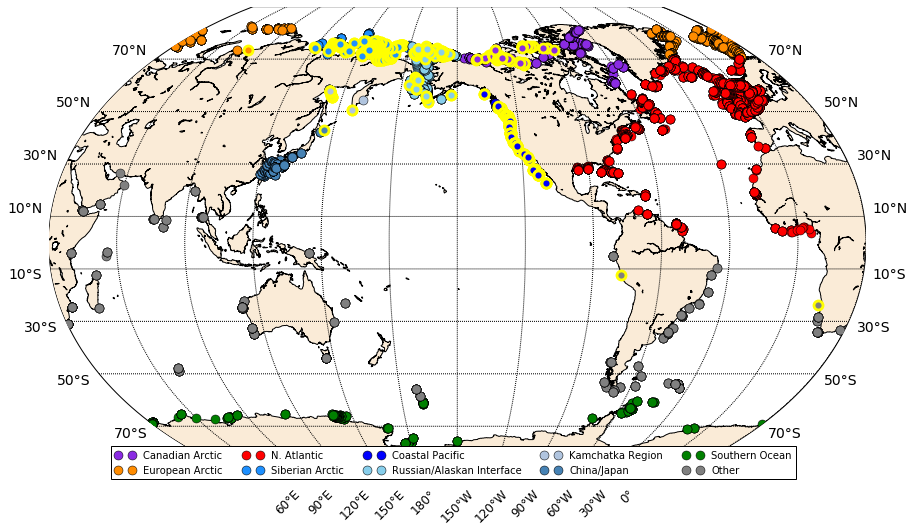

In [17]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
ms = 9
ew = 2.8

# create new figure, axes instances.
# fig=plt.figure()
fact = 2.2
fig = plt.figure(figsize=(6.66*fact, 6.66*fact))

#domain plot - BR run summer average
ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 

#ax=fig.add_axes([0.1,0.1,3.8,3.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-180.,llcrnrlat=-80.,urcrnrlon=180.,urcrnrlat=85.,\
            rsphere=(6378137.00,6378137.00),\
            resolution='l',projection='kav7',\
            lat_0=40.,lon_0=-150.,lat_ts=20.)

# rsphere=(6378137.00,6356752.3142)

m.drawcoastlines()
m.fillcontinents(color = 'antiquewhite')
# draw parallels
m.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1], fontsize = 14)
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1], fontsize = 12, rotation = 45)

for i in range(1,10):
    this_lon = tLON[(tGEO == i)&filt_DEPTH2& filt_EST]
    this_lat = tLAT[(tGEO == i)&filt_DEPTH2& filt_EST]
    x,y = m(this_lon, this_lat)
    tpl = list_places[i]
    m.plot(x, y, markerfacecolor = PLACES_withdat[tpl]['colour'], markersize=ms,\
           marker = 'o', markeredgecolor = None, linestyle = '',\
           label = PLACES_withdat[tpl]['name'])
    this_lon = tLON[(tGEO == i)&filt_DEPTH2&filt_ALK_DIC& filt_EST]
    this_lat = tLAT[(tGEO == i)&filt_DEPTH2&filt_ALK_DIC& filt_EST]
    x,y = m(this_lon, this_lat)
    m.plot(x, y, markerfacecolor = PLACES_withdat[tpl]['colour'], markersize=ms,\
           marker = 'o', markeredgecolor = 'yellow', markeredgewidth = ew, linestyle = '')

this_lon = tLON[(tGEO == 0)&filt_DEPTH2& filt_EST]
this_lat = tLAT[(tGEO == 0)&filt_DEPTH2& filt_EST]
x,y = m(this_lon, this_lat)
m.plot(x, y, markerfacecolor = 'grey', markersize=ms,\
       marker = 'o', markeredgecolor = None, linestyle = '',\
       label = 'Other')
this_lon = tLON[(tGEO == 0)&filt_DEPTH2&filt_ALK_DIC& filt_EST]
this_lat = tLAT[(tGEO == 0)&filt_DEPTH2&filt_ALK_DIC& filt_EST]
x,y = m(this_lon, this_lat)
m.plot(x, y, markerfacecolor = 'grey', markersize=ms,\
       marker = 'o', markeredgecolor = 'yellow', markeredgewidth = ew, linestyle = '')    

#plt.legend(bbox_to_anchor=[0.84, 0.74], fontsize = 9)
plt.legend(bbox_to_anchor=[0.92, 0.079], fontsize = 10, ncol = 5)
plt.show()
plt.show()

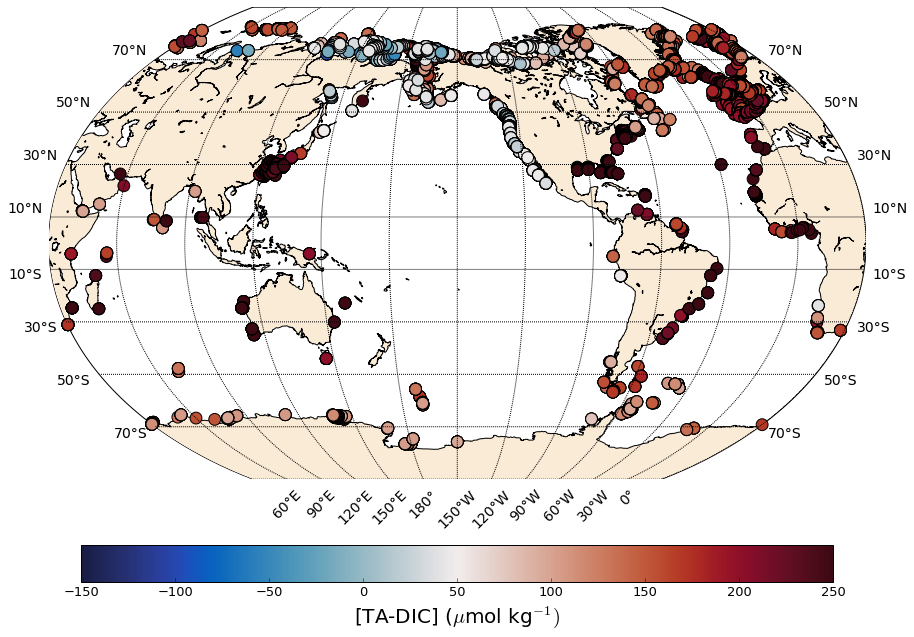

In [18]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
ms = 9
ew = 2.8
ts = 140
fs = 16

# create new figure, axes instances.
# fig=plt.figure()
fact = 2.2
fig = plt.figure(figsize=(6.66*fact, 6.66*fact))

#domain plot - BR run summer average
ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 

#ax=fig.add_axes([0.1,0.1,3.8,3.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-180.,llcrnrlat=-80.,urcrnrlon=180.,urcrnrlat=85.,\
            rsphere=(6378137.00,6378137.00),\
            resolution='l',projection='kav7',\
            lat_0=40.,lon_0=-150.,lat_ts=20.)

# rsphere=(6378137.00,6356752.3142)

m.drawcoastlines()
m.fillcontinents(color = 'antiquewhite')
# draw parallels
m.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1], fontsize = 14)
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1], fontsize = 14, rotation = 45)


this_lon = tLON[filt_DEPTH2& filt_EST ]
this_lat = tLAT[filt_DEPTH2& filt_EST]
this_ALK_DIC = tALK_DIC[filt_DEPTH2& filt_EST]
x,y = m(this_lon, this_lat)



plt.scatter(x, y, c=this_ALK_DIC, s = ts, cmap=cm.balance, vmin=-150, vmax=250, zorder=2)

this_lon = tLON[filt_DEPTH2& filt_EST &filt_ALK_DIC]
this_lat = tLAT[filt_DEPTH2& filt_EST& filt_ALK_DIC]
this_ALK_DIC = tALK_DIC[filt_DEPTH2& filt_EST& filt_ALK_DIC]
x,y = m(this_lon, this_lat)

plt.scatter(x, y, c=this_ALK_DIC, s = ts, cmap=cm.balance,\
            vmin=-150, vmax=250, zorder=2)
cbar = plt.colorbar(orientation = 'horizontal',fraction=0.046, pad=0.08)

cbar.set_label(label='[TA-DIC] ($\mu$mol kg$^{-1})$', size=fs+4)

plt.show()
plt.show()

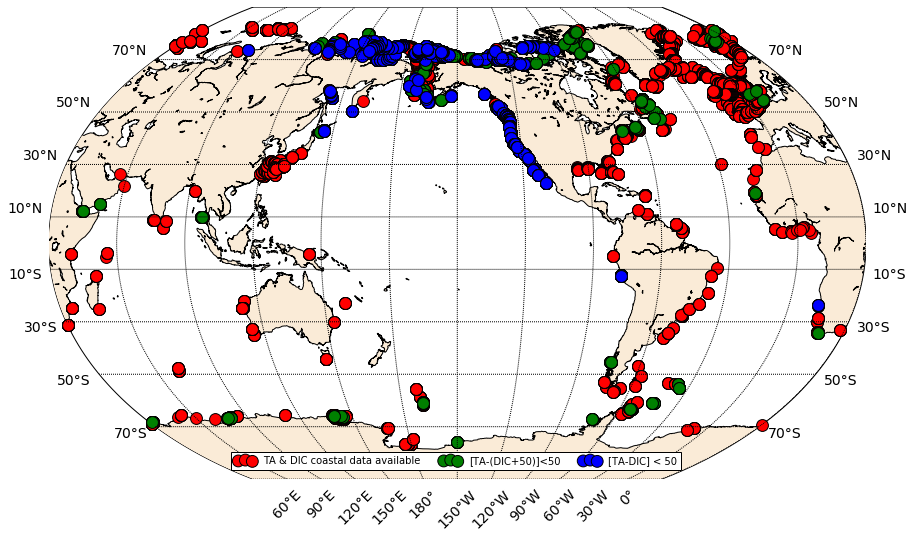

In [19]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
ms = 9
ew = 2.8
ts = 140
fs = 16

# create new figure, axes instances.
# fig=plt.figure()
fact = 2.2
fig = plt.figure(figsize=(6.66*fact, 6.66*fact))

#domain plot - BR run summer average
ax = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 

#ax=fig.add_axes([0.1,0.1,3.8,3.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-180.,llcrnrlat=-80.,urcrnrlon=180.,urcrnrlat=85.,\
            rsphere=(6378137.00,6378137.00),\
            resolution='l',projection='kav7',\
            lat_0=40.,lon_0=-150.,lat_ts=20.)

# rsphere=(6378137.00,6356752.3142)

m.drawcoastlines()
m.fillcontinents(color = 'antiquewhite')
# draw parallels
m.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1], fontsize = 14)
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1], fontsize = 14, rotation = 45)


this_lon = tLON[filt_DEPTH2& filt_EST ]
this_lat = tLAT[filt_DEPTH2& filt_EST]
this_ALK_DIC = tALK_DIC[filt_DEPTH2& filt_EST]
x,y = m(this_lon, this_lat)
plt.scatter(x, y, c='red', s = ts, zorder=2, label = 'TA & DIC coastal data available')

this_lon = tLON[filt_DEPTH2& filt_EST & filt_ALK_DIC2 ]
this_lat = tLAT[filt_DEPTH2& filt_EST& filt_ALK_DIC2 ]
this_ALK_DIC = tALK_DIC[filt_DEPTH2& filt_EST& filt_ALK_DIC2 ]
x,y = m(this_lon, this_lat)
plt.scatter(x, y, c='green', s = ts, zorder=2, label = '[TA-(DIC+50)]<50')

this_lon = tLON[filt_DEPTH2& filt_EST & filt_ALK_DIC ]
this_lat = tLAT[filt_DEPTH2& filt_EST& filt_ALK_DIC ]
this_ALK_DIC = tALK_DIC[filt_DEPTH2& filt_EST& filt_ALK_DIC ]
x,y = m(this_lon, this_lat)
plt.scatter(x, y, c='blue', s = ts, zorder=2, label = '[TA-DIC] < 50')

#cbar = plt.colorbar(orientation = 'horizontal',fraction=0.046, pad=0.08)
plt.legend(bbox_to_anchor=[0.78, 0.069], fontsize = 10, ncol = 3)
#cbar.set_label(label='[TA-DIC] ($\mu$mol kg$^{-1})$', size=fs+4)

plt.show()
plt.show()

(10, 30)
(10, 50)
(10, 50)


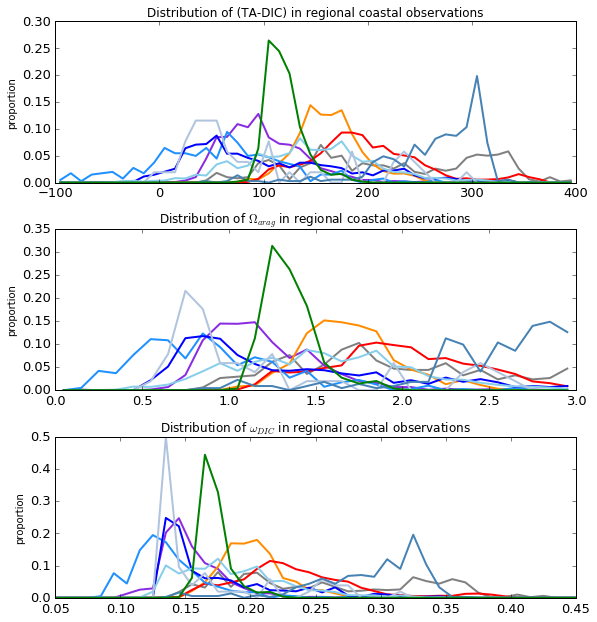

In [22]:


fact = 0.7
fig = plt.figure(figsize=(12*fact, 12.5*fact))

##############################
ax6 = plt.subplot(3,1,2)
ax6.set_title('Distribution of $\Omega_{arag}$ in regional coastal observations')
ax6.set_ylabel('proportion')

#histogram of omega:
nbins = 30
hist_stor = np.zeros([len(list_places),30])
print(np.shape(hist_stor))

for i in range(0,len(list_places)):
    tGEODAT = PLACES_withdat[list_places[i]]['geodat']
    w = t_OmegaA_A[filt_DEPTH2& filt_EST & (tGEO == tGEODAT) & filt_SAL & filt_TEMP & filt_DIC & filt_ALK]
    hist_Omega, bins = np.histogram(w, bins=nbins, range = [0, 3])
    hist_stor[i,:] = hist_Omega
    
bin_cent = bins + (bins[1]-bins[0])/2

for i in range(0,10):
    tot_count = np.sum(hist_stor[i,:])
    ax6.plot(bin_cent[0:nbins],hist_stor[i,:]/tot_count, \
             color = PLACES_withdat[list_places[i]]['colour'], lw = 2,label = PLACES_withdat[list_places[i]]['name'])
#ax6.legend(bbox_to_anchor=[1.5, 0.95])

############################
ax6 = plt.subplot(3,1,1)
ax6.set_title('Distribution of (TA-DIC) in regional coastal observations')
ax6.set_ylabel('proportion')

#histogram of omega:
nbins = 50
hist_stor = np.zeros([len(list_places),nbins])
print(np.shape(hist_stor))

for i in range(0,len(list_places)):
    tGEODAT = PLACES_withdat[list_places[i]]['geodat']
    w = tALK_DIC[filt_DEPTH2& filt_EST & (tGEO == tGEODAT) & filt_SAL & filt_TEMP & filt_DIC & filt_ALK]
    hist_Omega, bins = np.histogram(w, bins=nbins, range = [-100, 400])
    hist_stor[i,:] = hist_Omega
    
bin_cent = bins + (bins[1]-bins[0])/2

for i in range(0,10):
    tot_count = np.sum(hist_stor[i,:])
    ax6.plot(bin_cent[0:nbins],hist_stor[i,:]/tot_count, \
             color = PLACES_withdat[list_places[i]]['colour'], lw = 2,label = PLACES_withdat[list_places[i]]['name'])

############################
ax6 = plt.subplot(3,1,3)
ax6.set_title('Distribution of $\omega_{DIC}$ in regional coastal observations')
ax6.set_ylabel('proportion of observations')
ax6.set_ylabel('proportion')
ax6.set_xlim(0.05,0.45)
#histogram of omega:
nbins = 50
hist_stor = np.zeros([len(list_places),nbins])
print(np.shape(hist_stor))

for i in range(0,len(list_places)):
    tGEODAT = PLACES_withdat[list_places[i]]['geodat']
    w = t_omega_DIC[filt_DEPTH2& filt_EST & (tGEO == tGEODAT) & filt_SAL & filt_TEMP & filt_DIC & filt_ALK]
    hist_Omega, bins = np.histogram(-1 * w, bins=nbins, range = [0, 0.5])
    hist_stor[i,:] = hist_Omega
    
 
bin_cent = bins + (bins[1]-bins[0])/2

for i in range(0,10):
    tot_count = np.sum(hist_stor[i,:])
    ax6.plot(bin_cent[0:nbins],hist_stor[i,:]/tot_count, \
             color = PLACES_withdat[list_places[i]]['colour'], lw = 2,label = PLACES_withdat[list_places[i]]['name'])

plt.tight_layout()